The **Gap statistic** is a standard method for 
determining the number of clusters in a set of data.

The Gap statistic **standardizes** the graph of log(Wk), where Wk is the within-cluster dispersion, by comparing it to its expectation under an appropriate null reference distribution of the data.


**IN SIMPLE TERMS**

The idea of the Gap statistic is to compare the **within-cluster dispersion** to its expectation under an appropriate **null reference distribution**.

The gap statistic compares the total intracluster variation for different values of k with their expected values under null reference distribution of the data (Null reference distribution of data refers to generating random samples of testing data under null hypothesis. i.e. a distribution with no obvious clustering).


**IMPLEMENTATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
cluster_df = pd.read_csv('/content/drive/MyDrive/iris.csv')

In [3]:
cluster_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
cluster_df = cluster_df.drop(['species'], axis = 1)

In [5]:
from sklearn.cluster import KMeans

In [6]:
!pip install cluster

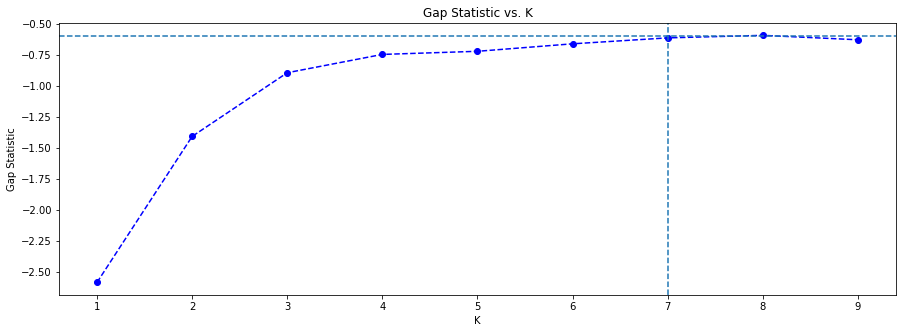

In [8]:

def optimalK(data, nrefs=3, maxClusters=5):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(cluster_df, nrefs=5, maxClusters=10)
fig = plt.figure(figsize=(15,5))
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')
plt.axhline(y = -0.6, linestyle = '--')
plt.axvline(x = 7, linestyle = '--')


Gap statistics is maximized with 7 clusters and hence, 7 clusters can be chosen for K means.